In [1]:
import numpy as np
import os
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score
from scipy.stats import entropy as shannon_entropy
import matplotlib.pyplot as plt


from src.data.components.helsinki import HelsinkiProminenceExtractor
from src.data.components.datasets import TokenTaggingDataset
from torch.utils.data import DataLoader

/opt/homebrew/Caskroom/miniforge/base/envs/prosody/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_DIR = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/data/Helsinki"
SAVE_DIR = (
    "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/relative"
)

In [3]:
train_extractor = HelsinkiProminenceExtractor(
    DATA_DIR,
    "train_360.txt",
)
train_texts = train_extractor.get_all_texts()
train_prominences = train_extractor.get_all_real_prominence()

test_extractor = HelsinkiProminenceExtractor(
    DATA_DIR,
    "test.txt",
)
test_texts = test_extractor.get_all_texts()
test_prominences = test_extractor.get_all_real_prominence()

print(f"train_texts: {len(train_texts)}, test_texts: {len(test_texts)}")

train_texts: 116263, test_texts: 4822


In [4]:
train_prominences_flat = [item for sublist in train_prominences for item in sublist]
np.mean(train_prominences_flat), np.std(train_prominences_flat)

(0.7272557007744903, 0.7953191125178041)

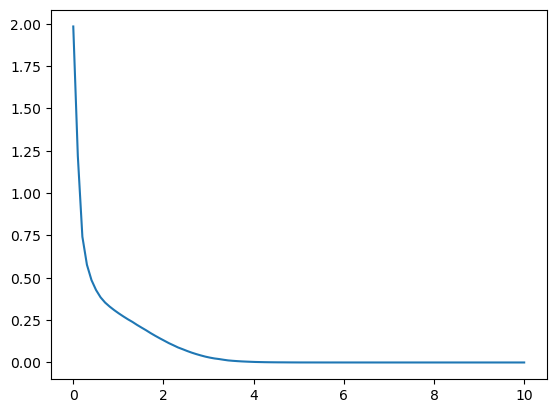

In [5]:
# kernel density estimation
from scipy.stats import gaussian_kde

density = gaussian_kde(train_prominences_flat)

# plot density
xs = np.linspace(0, 10, 100)
plt.plot(xs, density(xs))
plt.show()

In [6]:
def mc_entropy(density, samples, nb_samples):
    """Monte Carlo estimation of entropy."""
    samples = np.random.choice(samples, nb_samples)
    return -np.mean(np.log(density(samples)))

In [7]:
NB_SAMPLES = 10000

entropy = mc_entropy(density, train_prominences_flat, NB_SAMPLES)
print(f"Monte Carlo entropy estimate: {entropy}")

Monte Carlo entropy estimate: 0.6569407171032515
